<h1>Primera Parte<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DATASET" data-toc-modified-id="DATASET-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATASET</a></span></li><li><span><a href="#EVALUACION-PARA-LA-SELECCION-DE-MODELOS" data-toc-modified-id="EVALUACION-PARA-LA-SELECCION-DE-MODELOS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EVALUACION PARA LA SELECCION DE MODELOS</a></span><ul class="toc-item"><li><span><a href="#MODELO-TREE" data-toc-modified-id="MODELO-TREE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MODELO TREE</a></span></li><li><span><a href="#MODELO-KNN" data-toc-modified-id="MODELO-KNN-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>MODELO KNN</a></span></li><li><span><a href="#MODELO-REGRESION" data-toc-modified-id="MODELO-REGRESION-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>MODELO REGRESION</a></span></li><li><span><a href="#SVM-con-kernel-lineal" data-toc-modified-id="SVM-con-kernel-lineal-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>SVM con kernel lineal</a></span></li><li><span><a href="#SVM-con-kernel-rbf" data-toc-modified-id="SVM-con-kernel-rbf-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>SVM con kernel rbf</a></span></li><li><span><a href="#SVM-con-kernel-sigmoid" data-toc-modified-id="SVM-con-kernel-sigmoid-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>SVM con kernel sigmoid</a></span></li><li><span><a href="#SVM-con-kernel-poly" data-toc-modified-id="SVM-con-kernel-poly-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>SVM con kernel poly</a></span></li></ul></li></ul></div>

### DATASET

Primera parte, analisis y evaluacion de modelos sin normalizar, ni estandarizar.

In [76]:
import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
import warnings
warnings.simplefilter('ignore')

In [78]:
df= pd.read_csv("abalone1_3677.csv", sep=',')

In [79]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.415,0.325,0.115,0.3285,0.1405,0.0510,0.106,12.0
1,0.0,0.610,0.470,0.145,1.1530,0.4030,0.2960,0.320,14.0
2,1.0,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.015,4.0
3,1.0,0.550,0.420,0.135,0.8160,0.3995,0.1485,0.230,12.0
4,2.0,0.485,0.355,0.120,0.5470,0.2150,0.1615,0.140,10.0
...,...,...,...,...,...,...,...,...,...
3672,0.0,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9.0
3673,0.0,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12.0
3674,2.0,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11.0
3675,2.0,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9.0


Miro la informacion del dataset, el tipo de datos y si hay null

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3677 non-null   float64
 1   Length          3677 non-null   float64
 2   Diameter        3677 non-null   float64
 3   Height          3677 non-null   float64
 4   Whole weight    3677 non-null   float64
 5   Shucked weight  3677 non-null   float64
 6   Viscera weight  3677 non-null   float64
 7   Shell weight    3677 non-null   float64
 8   Rings           3677 non-null   float64
dtypes: float64(9)
memory usage: 258.7 KB


Modifico el tipo de datos de la variable "Sexo", a string y la variable target "Rings" a int

In [81]:
df.Sex= df.Sex.astype(np.int)
df.Sex= df.Sex.astype(np.str)
df.Rings= df.Rings.astype(np.int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3677 non-null   object 
 1   Length          3677 non-null   float64
 2   Diameter        3677 non-null   float64
 3   Height          3677 non-null   float64
 4   Whole weight    3677 non-null   float64
 5   Shucked weight  3677 non-null   float64
 6   Viscera weight  3677 non-null   float64
 7   Shell weight    3677 non-null   float64
 8   Rings           3677 non-null   int32  
dtypes: float64(7), int32(1), object(1)
memory usage: 244.3+ KB


Observo datos estadisticos de las variables numericas, su distribucion, si existen outliers

In [82]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,0.524373,0.408113,0.139633,0.829556,0.360247,0.180669,0.239167,9.939625
std,0.119955,0.099231,0.042335,0.493281,0.223983,0.109950,0.139968,3.218579
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.185000,0.092000,0.129500,8.000000
50%,0.545000,0.425000,0.140000,0.800500,0.336000,0.171000,0.232500,9.000000
75%,0.615000,0.480000,0.165000,1.151000,0.503000,0.253500,0.330000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


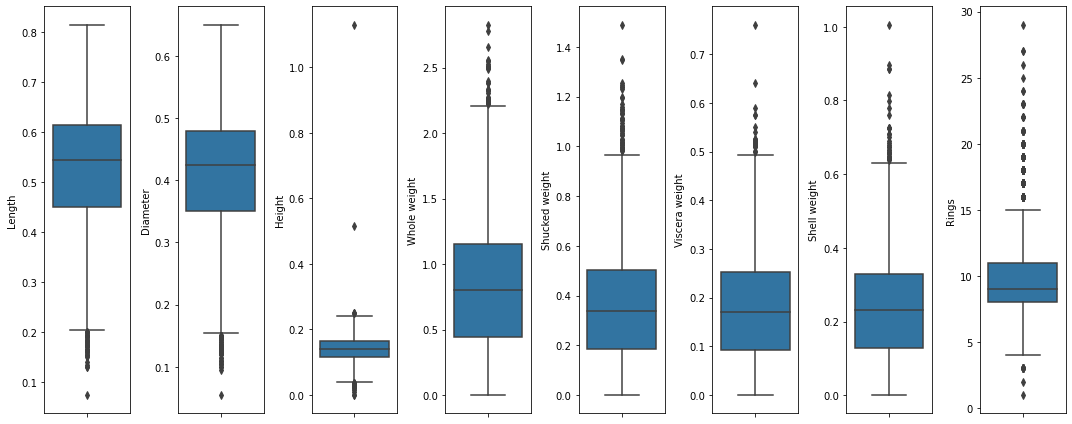

In [83]:
variables = ['Length', 'Diameter','Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight','Rings']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

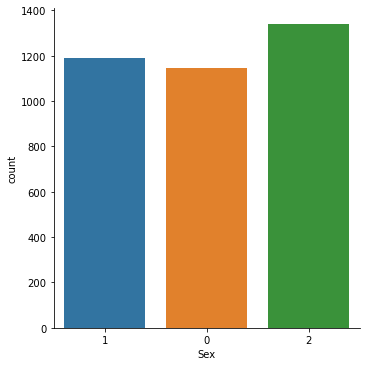

In [84]:
sex = sns.catplot(x="Sex",
                kind="count",
                data=df)

In [85]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.415,0.325,0.115,0.3285,0.1405,0.0510,0.106,12
1,0,0.610,0.470,0.145,1.1530,0.4030,0.2960,0.320,14
2,1,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.015,4
3,1,0.550,0.420,0.135,0.8160,0.3995,0.1485,0.230,12
4,2,0.485,0.355,0.120,0.5470,0.2150,0.1615,0.140,10
...,...,...,...,...,...,...,...,...,...
3672,0,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
3673,0,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3674,2,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3675,2,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


Aplico la tranformacion de la variable categorica en un nuevo dataset

In [86]:
aba= pd.get_dummies(df,columns=['Sex'])

In [87]:
X= aba.drop(axis=1, columns= 'Rings')
y= aba[['Rings']]

Divido en validation train, validation test

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state= 123)
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train, test_size= 0.20, random_state= 123)

### EVALUACION PARA LA SELECCION DE MODELOS

Comenzaremos las pruebas con los datos sin normalizar

#### MODELO TREE

In [89]:
# Importamos las librerías para los modelos
from sklearn.tree import DecisionTreeRegressor
# Importamos las librerías para evaluar
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
profundidades=np.arange(1,20,1)

p_max=0
R2_max=0
MSE_min=0
RMSE_min=0

for p in profundidades: 
    modeloT= DecisionTreeRegressor(max_depth=p, random_state=123)       
    modeloT.fit(X_val_train, y_val_train) 
    
    y_val_pred = modeloT.predict(X_val_test)     
    R2= r2_score(y_val_test, y_val_pred)
    MSE= mean_squared_error(y_val_test, y_val_pred)
    RMSE= mean_squared_error(y_val_test, y_val_pred,squared=False)
    
    if R2 > R2_max:
        p_max=p
        R2_max=R2
        RMSE_min=RMSE
        MSE_min=MSE
        
    
print('Valor de :profundidad ', p_max)
print("RMSE: ", round(RMSE_min,3))
print("MSE: ", round(MSE_min,3))
print("R2: ", round(R2_max,3))


Valor de :profundidad  6
RMSE:  2.277
MSE:  5.185
R2:  0.526


#### MODELO KNN

In [91]:
# librerías para los modelos
from sklearn import neighbors

In [92]:
k_valores=np.arange(1,20,1)

k_max=0
RMSE_k_max=100

for k in k_valores:
    modelokNN = neighbors.KNeighborsRegressor(n_neighbors=k,weights='uniform')
    modelokNN.fit(X_val_train, y_val_train)
    
    y_val_pred = modelokNN.predict(X_val_test)
    
    RMSEkNN = mean_squared_error(y_val_test, y_val_pred, squared=False)
    R2_kNN=round(r2_score(y_val_test, y_val_pred),3)
    
    if RMSEkNN < RMSE_k_max:
        k_max=k
        RMSE_k_max=RMSEkNN
        R2_kNN_max=R2_kNN
        
    
print('Valor de :profundidad ', k_max)
print("RMSE: ", round(RMSE_k_max,3))
print("R2: ", round(R2_kNN,3))


Valor de :profundidad  14
RMSE:  2.214
R2:  0.541


In [93]:
k_valores=np.arange(1,20,1)

k_max=0
RMSE_k_max=100

for k in k_valores:
    modelokNN = neighbors.KNeighborsRegressor(n_neighbors=k,weights='distance')
    modelokNN.fit(X_val_train, y_val_train)
    
    y_val_pred = modelokNN.predict(X_val_test)
    
    RMSEkNN = mean_squared_error(y_val_test, y_val_pred, squared=False)
    R2_kNN=round(r2_score(y_val_test, y_val_pred),3)
    
    if RMSEkNN < RMSE_k_max:
        k_max=k
        RMSE_k_max=RMSEkNN
        R2_kNN_max=R2_kNN
        
    
print('Valor de :profundidad ', k_max)
print("RMSE: ", round(RMSE_k_max,3))
print("R2: ", round(R2_kNN,3))


Valor de :profundidad  14
RMSE:  2.211
R2:  0.546


#### MODELO REGRESION

In [94]:
# librerías para los modelos
from sklearn import linear_model

In [20]:
modelo = linear_model.LinearRegression(fit_intercept=True)            
modelo.fit(X_val_train, y_val_train)

print('COEFICIENTE de la variable x: ',modelo.coef_)
print('Término Independiente o INTERCEPT: ',modelo.intercept_)
print("EVALUACIÓN del modelo de Regresión Lineal: ")
print("Coeficiente de Determinación R2: ",round(modelo.score(X_val_test,y_val_test),3))

y_val_pred = modelo.predict(X_val_test)                                       
print("MSE: ",round(mean_squared_error(y_val_test, y_val_pred),3))            
print("RMSE: ",round(mean_squared_error(y_val_test, y_val_pred, squared=False),3)) 

COEFICIENTE de la variable x:  [[  0.45413539   9.38155008   6.89032535   7.63943045 -18.62091273
   -8.18010899  11.07510088   0.27835815  -0.53894273   0.26058458]]
Término Independiente o INTERCEPT:  [4.07189165]
EVALUACIÓN del modelo de Regresión Lineal: 
Coeficiente de Determinación R2:  0.53
MSE:  5.15
RMSE:  2.269


#### SVM con kernel lineal

In [95]:
from sklearn.svm import SVR

In [100]:
RMSE_SVM_max=100
c_iter=[1,10,100,1000,10000,100000]

for c in c_iter:       
    svr_lin=SVR(C=c, kernel='linear')
    svr_lin.fit(X_val_train, y_val_train)
    pred = svr_lin.predict(X_val_test)
    RMSE = mean_squared_error(pred, y_val_test,squared=False) 
    score = svr_lin.score(X_val_test, y_val_test)
        
    print("--------------------------------")
    print("Kernel:linear")
    print("C: ",c)
    print("RMSE: ",RMSE)
    print("score: ",score)
        
    if RMSE < RMSE_SVM_max:
        RMSE_SVM_max= RMSE
        c_max= c
        score_max=score
    
print("___________________________________")

print("MEJOR C: ",c_max)
print("MEJOR RMSE: ",RMSE_SVM_max)
print("MEJOR score: ",score_max)

--------------------------------
Kernel:linear
C:  1
RMSE:  2.3925382602134455
score:  0.4771978256048436
--------------------------------
Kernel:linear
C:  10
RMSE:  2.3106986833400684
score:  0.5123522374267786
--------------------------------
Kernel:linear
C:  100
RMSE:  2.2996612511000976
score:  0.516999770456999
--------------------------------
Kernel:linear
C:  1000
RMSE:  2.299071465413793
score:  0.5172474852822857
--------------------------------
Kernel:linear
C:  10000
RMSE:  2.3002987023458807
score:  0.5167319642570005
--------------------------------
Kernel:linear
C:  100000
RMSE:  2.2966582495318413
score:  0.5182603938764069
___________________________________
MEJOR C:  100000
MEJOR RMSE:  2.2966582495318413
MEJOR score:  0.5182603938764069


#### SVM con kernel rbf

In [105]:
RMSE_SVM_max=100
c_iter=[0.01,0.1,0.10,1,10,100,1000,10000]

for c in c_iter:       
    svr_lin=SVR(C=c, kernel='rbf')
    svr_lin.fit(X_val_train, y_val_train)
    pred = svr_lin.predict(X_val_test)
    RMSE = mean_squared_error(pred, y_val_test,squared=False) 
    score = svr_lin.score(X_val_test, y_val_test)
        
    print("--------------------------------")
    print("Kernel: rbf")
    print("C: ",c)
    print("RMSE: ",RMSE)
    print("score: ",score)
        
    if RMSE < RMSE_SVM_max:
        RMSE_SVM_max= RMSE
        c_max= c
        score_max=score
    
print("___________________________________")

print("MEJOR C: ",c_max)
print("MEJOR RMSE: ",RMSE_SVM_max)
print("MEJOR score: ",score_max)

--------------------------------
Kernel: rbf
C:  0.01
RMSE:  2.928757142881578
score:  0.21659502759431848
--------------------------------
Kernel: rbf
C:  0.1
RMSE:  2.681975499328701
score:  0.34305469318095794
--------------------------------
Kernel: rbf
C:  0.1
RMSE:  2.681975499328701
score:  0.34305469318095794
--------------------------------
Kernel: rbf
C:  1
RMSE:  2.378571999359868
score:  0.4832836470269952
--------------------------------
Kernel: rbf
C:  10
RMSE:  2.196477898648558
score:  0.5593707964052244
--------------------------------
Kernel: rbf
C:  100
RMSE:  2.1568627660008666
score:  0.5751216237241856
--------------------------------
Kernel: rbf
C:  1000
RMSE:  2.174559660199387
score:  0.56812083135577
--------------------------------
Kernel: rbf
C:  10000
RMSE:  2.207125483840357
score:  0.5550884783262109
___________________________________
MEJOR C:  100
MEJOR RMSE:  2.1568627660008666
MEJOR score:  0.5751216237241856


#### SVM con kernel sigmoid

In [103]:
RMSE_SVM_max=100
c_iter=[0.001,0.01,0.1,0.10,1,10,100,1000,10000]

for c in c_iter:       
    svr_lin=SVR(C=c, kernel='sigmoid')
    svr_lin.fit(X_val_train, y_val_train)
    pred = svr_lin.predict(X_val_test)
    RMSE = mean_squared_error(pred, y_val_test,squared=False) 
    score = svr_lin.score(X_val_test, y_val_test)
        
    print("--------------------------------")
    print("Kernel: sigmoid")
    print("C: ",c)
    print("RMSE: ",RMSE)
    print("score: ",score)
        
    if RMSE < RMSE_SVM_max:
        RMSE_SVM_max= RMSE
        c_max= c
        score_max=score
    
print("___________________________________")

print("MEJOR C: ",c_max)
print("MEJOR RMSE: ",RMSE_SVM_max)
print("MEJOR score: ",score_max)

--------------------------------
Kernel: sigmoid
C:  0.001
RMSE:  3.246127655060497
score:  0.037610687658077846
--------------------------------
Kernel: sigmoid
C:  0.01
RMSE:  3.01769962777162
score:  0.1682905792286542
--------------------------------
Kernel: sigmoid
C:  0.1
RMSE:  5.641736720181475
score:  -1.907001345540336
--------------------------------
Kernel: sigmoid
C:  0.1
RMSE:  5.641736720181475
score:  -1.907001345540336
--------------------------------
Kernel: sigmoid
C:  1
RMSE:  50.90558088506654
score:  -235.67391633657732
--------------------------------
Kernel: sigmoid
C:  10
RMSE:  506.5076617228989
score:  -23430.044046278435
--------------------------------
Kernel: sigmoid
C:  100
RMSE:  5062.212303728156
score:  -2340454.0911289933
--------------------------------
Kernel: sigmoid
C:  1000
RMSE:  50619.11859318094
score:  -234017727.54029477
--------------------------------
Kernel: sigmoid
C:  10000
RMSE:  506188.1899283112
score:  -23401495836.803997
__________

#### SVM con kernel poly

In [97]:
RMSE_SVM_max=100
c_iter=[0.1,1,10,100,1000,10000]
grad=np.arange(2,6,1)

for c in c_iter:
    for g in grad:
    
        svr_lin=SVR(C=c, kernel="poly", degree=g)
        svr_lin.fit(X_val_train, y_val_train)
        pred = svr_lin.predict(X_val_test)
        RMSE = mean_squared_error(pred, y_val_test,squared=False) 
        score = svr_lin.score(X_val_test, y_val_test)
        
        print("--------------------------------")
        print("Kernel poli grado",g)
        print("C: ",c)
        print("RMSE: ",RMSE)
        print("score: ",score)
        
        if RMSE < RMSE_SVM_max:
            RMSE_SVM_max= RMSE
            c_max= c
            g_max=g
            score_max=score
    
print("__________________________________")
print("MEJOR Kernel poli grado",g_max)
print("MEJOR C: ",c_max)
print("MEJOR RMSE: ",RMSE_SVM_max)
print("MEJOR score: ",score_max)

--------------------------------
Kernel poli grado 2
C:  1
RMSE:  2.3938084952717995
score:  0.476642550943547
--------------------------------
Kernel poli grado 3
C:  1
RMSE:  2.325142715034874
score:  0.506236672175234
--------------------------------
Kernel poli grado 4
C:  1
RMSE:  2.301948942821398
score:  0.5160383199579751
--------------------------------
Kernel poli grado 5
C:  1
RMSE:  2.2529486994132912
score:  0.5364226508981945
--------------------------------
Kernel poli grado 2
C:  10
RMSE:  2.234709554511687
score:  0.5438982129837615
--------------------------------
Kernel poli grado 3
C:  10
RMSE:  2.1974325571420996
score:  0.5589876905010549
--------------------------------
Kernel poli grado 4
C:  10
RMSE:  2.182097935882107
score:  0.5651213577349816
--------------------------------
Kernel poli grado 5
C:  10
RMSE:  2.2070383133671085
score:  0.5551236212143805
--------------------------------
Kernel poli grado 2
C:  100
RMSE:  2.144631860303713
score:  0.5799266703